### Create image pyramide

In [2]:
import cv2
from matplotlib import pyplot as plt

from opticalFlow.utils import get_image_pyramide


In [3]:
kernel = (15, 15)
scale = 0.7
sigma = 3
size = 6

In [4]:
# load image is rgb
image = cv2.imread("opticalFlow/Datasets/middlebury_optical_flow/Wooden/frame10.png")[:,:,::-1]

In [5]:
image_pyr = get_image_pyramide(image, kernel, scale, sigma, size)

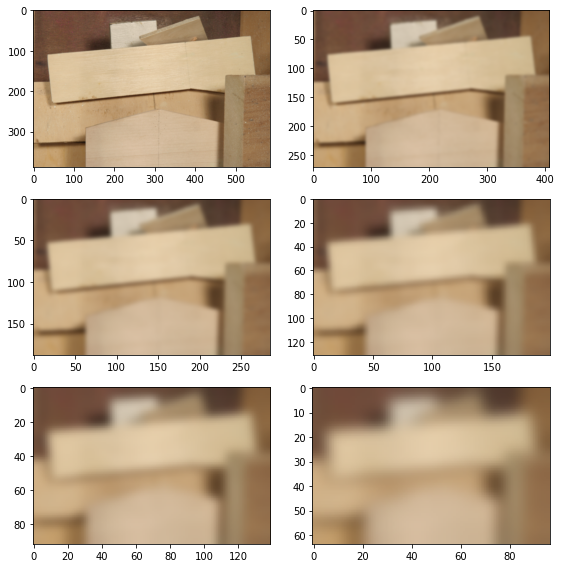

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
ax = axes.flatten()

for i in range(size):
    ax[i].imshow(image_pyr[i])

fig.tight_layout()
plt.show()

In [52]:
#Load two images

image_1 = cv2.imread("/home/thibahan/Dokumente/Datasets/middlebury_optical_flow/Army/frame10.png", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("/home/thibahan/Dokumente/Datasets/middlebury_optical_flow/Army/frame11.png", cv2.IMREAD_GRAYSCALE)

In [50]:
from opticalFlow.hornSchunck import horn_schunck_flow, horn_schunck_pyr_flow
from opticalFlow.draw_utils import mbcolor

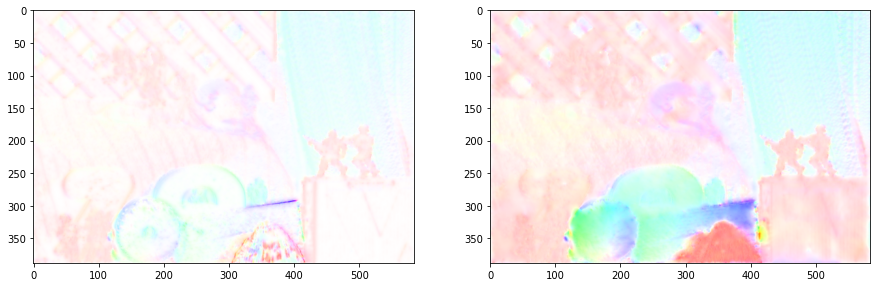

In [56]:
# Calculate the optical flow with Horn-Schunck method

flow = horn_schunck_flow(image_1, image_2, 15, 20)
flow = mbcolor(flow)

# Calculate the optical flow with pyyramidal Horn-Schunck method

flow_pyr = horn_schunck_pyr_flow(image_1, image_2, 15, 100, (5, 5), 0.65, 0.5, 10)
flow_pyr = mbcolor(flow_pyr)

# Plot flow
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.flatten()

ax[0].imshow(flow)
ax[1].imshow(flow_pyr)
